In [78]:
#Loading the packages we ar going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats
from scipy.stats import median_test
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Idea:
Male's and female's trip duration times are different.

To test this idea, the data for the month of July of 2017 will be used. 
The results of the test will be applicable to this month only. 
Also, since the data may have dispersion and outliers, only the trips last 45 minutes or less would be considered (also, 45 minutes is the allowable time for city bike users with a year pass). 

### Testable Hypothesis:
Male's and female's average trip time duration are significantly different.

### Null Hypothesis :
Male's and female's average trip time duration are equal.

The tests will be conducted with an alpha=0.05

H0: Triptime(Female)=Triptime(Male)

H1: Triptime(Female)<>Triptime(Male)


In [2]:
#Getting the data from url 
df=pd.read_csv("https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip")


In [3]:
#Here we visualize the first rows of the data set
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1


In [4]:
#Since we are only interested in gender and tripduration, we create a new df, (df_r) that contains only the variables of interest.
df_r=df[[ 'tripduration', "gender"]]
df_r.head()


,tripduration,gender
0,340,2
1,439,1
2,186,1
3,442,1
4,170,1


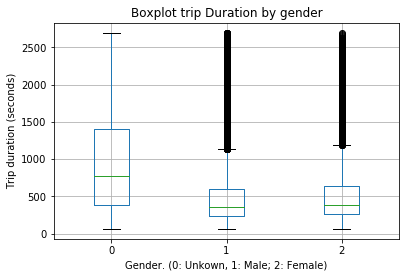

In [66]:
#here we do a visualization of the original database 
df_r.boxplot(column="tripduration",by='gender')

xlabel("Gender. (0: Unkown, 1: Male; 2: Female)")
ylabel("Trip duration (seconds)")
title("Boxplot trip Duration by gender")
suptitle("");

Figure 1. 
We can see that there are lot of outliers.
We proceed to strip the trip durations greater than 45 minutes.

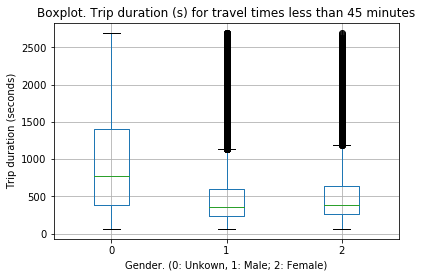

In [100]:
#Here we strip the durations greater than 45 minutes
#We also remove variables of the "unkown" gender (we'll use it later)

df_r=df_r[df_r["tripduration"]<=2700] #this removes the times greater than 2700 (45 minutes) 
df_g=df_r[df_r["gender"]>0] #we create a new data frame with only the values for gender of 1 (male) and 2 (female)

df_r.boxplot(column="tripduration",by='gender')
xlabel("Gender. (0: Unkown, 1: Male; 2: Female)")
ylabel("Trip duration (seconds)")
title("Boxplot. Trip duration (s) for travel times less than 45 minutes")
suptitle("");
savefig('boxplot.png')


Figure 2. There're still a lot outliers, but at least is visible. We see that females and males have both lots of outliers, but also, that both boxplots are similar, although the females have a slighty greater mean value.
The Unkown group, on the other hand, has greater disperson and greater mean value. 

We'll graph it again removing values over 1000 and only comparing males and females.

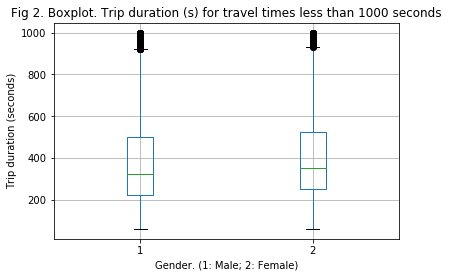

In [101]:
#Here we strip the durations greater than 45 minutes
#We also remove variables of the "unkown" gender

df_r_r=df_r[df_r["tripduration"]<=1000] #this removes the times greater than 2700 (45 minutes) 

df_g=df_r_r[df_r_r["gender"]>0] #we create a new data frame with only the values for gender of 1 (male) and 2 (female)

df_g.boxplot(column="tripduration",by='gender')
xlabel("Gender. (1: Male; 2: Female)")
ylabel("Trip duration (seconds)")
title("Fig 2. Boxplot. Trip duration (s) for travel times less than 1000 seconds")
suptitle("");

Figure 3. We are just zooming in in the previous graph. Again, males and females show similar patterns. 

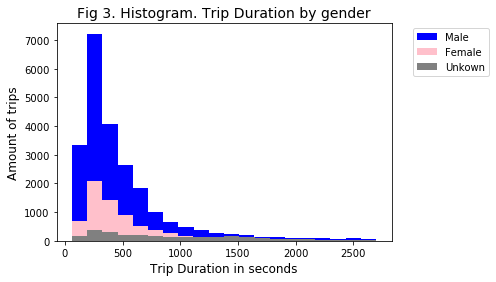

In [67]:
#We use the histogram as another type of visualization. 
hist(df_r[df_r["gender"]==1]["tripduration"],bins = 20, label = "Male", color="blue")
hist(df_r[df_r["gender"]==2]["tripduration"], bins = 20, label = "Female", color="pink")
hist(df_r[df_r["gender"]==0]["tripduration"], bins = 20, label = "Unkown", color="grey")


plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Fig 3. Histogram. Trip Duration by gender", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Fig 4. Counts of trip duration in both sexes. Note that this are total counts. The graph shows that the distribution is clearly not normal, so we will not be able to use parametric tests. Also, it would be better to normalize the graph. 

In [73]:
print "The total amount of females rides is",df_r[df_r["gender"]==2].count();
print "The total amount of males rides is",(df_r[df_r["gender"]==1]).count();

The total amount of females rides is tripduration    7035
gender          7035
dtype: int64
The total amount of males rides is tripduration    23094
gender          23094
dtype: int64


In [10]:
#we create new data frames with only the trip duration for each gender to visualize the descriptive statistics for each gender.
mal=df_r[df_r["gender"]==1]["tripduration"]
fem=df_r[df_r["gender"]==2]["tripduration"]

In [86]:
print "Males statistics"
print mal.describe()
print
print "Females statistics"
print fem.describe()

Males statistics
count    23094.000000
mean       496.889798
std        426.032647
min         62.000000
25%        235.000000
50%        352.000000
75%        593.000000
max       2697.000000
Name: tripduration, dtype: float64

Females statistics
count    7035.000000
mean      532.130348
std       434.418021
min        61.000000
25%       262.000000
50%       388.000000
75%       634.500000
max      2695.000000
Name: tripduration, dtype: float64


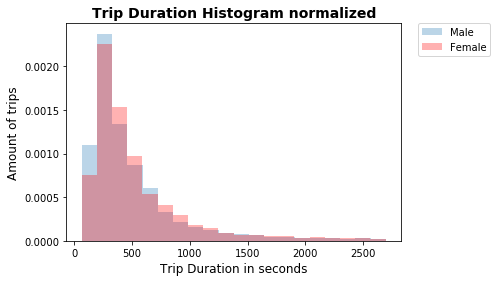

In [74]:
hist(mal, bins = 20, label = "Male", normed=1, alpha=0.3)
hist(fem, bins = 20, color="red", label = "Female", normed = 1, alpha=0.3)
#hist(df_r[df_r["gender"]==0]["tripduration"], bins = 20, color="green", label = "Unknown", normed = 1, alpha=0.3)

plt.xlabel("Trip Duration in seconds", fontsize=12)
plt.ylabel("Amount of trips", fontsize=12)
plt.title("Trip Duration Histogram normalized", weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Fig 5. Normalized counts for female and males. Here the pattern is more similar to what was evidenced in the boxplot. The two sexes show a similar distribution, but males have a greater number of short trips.

### Statistical Analysis
We will proceed to test statistical difference between both groups. As mentioned before, we will have to use non-parametric tests.

Suggested by the reviewer we will use Kruskall Wallis and Moods Median test

In [77]:
#Kruskall Wallis for two samples
stats.kruskal(mal,fem)

KruskalResult(statistic=103.39925079189837, pvalue=2.7397831118334302e-24)

The Null Hypothesys that they both come from the same parent distribution is rejected.

In [82]:
#Mood's median
stat, p, med, tbl = median_test(mal, fem)
print "The p-value for the median difference is",p,",rejecting the null hypothesis that the two samples come from populations with same median"

The p-value for the median difference is 7.70619780474e-16 ,rejecting the null hypothesis that the two samples come from populations with same median


Both tests reject the Null Hypothesis. However, in the graph we see that both means are very similar.

Let's try another approach, since this tests are sensible to the size of the samples. 
We'll create samples of 100 for males and females and repeat the KW test 1000 times and then average the p-value.
Then we'll repeat that for samples of size 1000. Maybe is not a valid way to do an statistical analysis, but is a way to look how the size of the sample is influencing the p-value.

In [11]:
#setting seed for reproducibiliy
np.random.seed(9)

#creating empty data frame to store the p values
pv_100=np.zeros((1000))

#loop for KW test
for i in range (0,1000):
    pv_u=stats.kruskal(mal.sample(100),fem.sample(100))[1]
    pv_100[i]=pv_u

In [89]:
#setting seed for reproducibiliy
np.random.seed(9)

#creating empty data frame to store the p values
pv_1000=np.zeros((1000))

#loop for KW test
for i in range (0,1000):
    pv_u=stats.kruskal(mal.sample(1000),fem.sample(1000))[1]
    pv_1000[i]=pv_u

In [90]:
print "The mean p value for 1000 samples of 100 females and males each is",pv_100.mean()
print "The mean p value for 1000 samples of 1000 females and males each is",pv_1000.mean()

The mean p value for 1000 samples of 100 females and males each is 0.364014779899
The mean p value for 1000 samples of 1000 females and males each is 0.025258734778


Note that the p value gets smaller with bigger samples and there is no statisicall difference for samples sizes of 100.
This a less elegant way to try to assess how meaninful is the difference between groups.
The statisticall difference although it exists, is due to the large size of the samples being compared making the p-value smaller. 


This was done including outliers. 
We can repeat this process removing the values that are too extreme (after observing the boxplot).
In this case, we are not going to consider values over 5000 seconds

In [98]:
#Kruskall Wallis for two samples
stats.kruskal(mal[mal<5000], fem[fem<5000])

KruskalResult(statistic=103.39925079189837, pvalue=2.7397831118334302e-24)

In [99]:
#Mood test
stat, p, med, tbl = median_test(mal[mal<5000], fem[fem<5000])
print "The p-value for the median difference is",p,",rejecting the null hypothesis that the two samples come from populations with same median"

The p-value for the median difference is 7.70619780474e-16 ,rejecting the null hypothesis that the two samples come from populations with same median


We arrive to the same conclusion. This is just to check that the difference between groups is not due to extreme values. 

Conclusion.
Although we rejected the Null Hypothesis that both sexes had the same tripduration, the difference (45 seconds aproximately) is not meaningful to elicit some further analysis.
What is interesting to note, is the difference in users, males perform aproximately 3 times more trips than females.

Also, as a side note, is how the statisticall tests offer little insight here. Although the difference is in fact significant, the effect size is not relevant, although this is invisible to the statisticall tests. 